# Исследование о пользователях и их поездках сервиса аренды самокатов

В нашем распоряжении сведения о некоторых пользователях и их поездках популярного сервиса аренды самокатов GoFast. Необходимо проанализировать эти данные и проверить несколько гипотез с целью помощи для роста бизнеса.
У сервиса GoFast есть мобильное приложение, через которое можно совершать поездки. Сервисом можно пользоваться с подпиской и без. Для анализа у нас есть данные о пользователях, информация об их поездках, а также вид подписки каждого пользователя.

Перед тем, как проводить исследование, выведем первые строки датафрейма, и изучим общую информацию. Затем изменим тип данных там, где это необходимо, и проверим данные на наличие пропусков и дубликатов. При необходимости, обработаем их. После этого, добавим в датафреймы новые столбцы, которые пригодятся нам для расчетов и построения графиков. После чего приступим к исследовательскому анализу данных и проверке гипотез. В конце составим общий вывод, где будут отражены основные результаты исследования.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

## Шаг 1. Загрузка данных

В нашем распоряжении 3 файла с данными. Прочтем их, для этого создадим 3 переменные, для каждого файла, и сохраним их. Затем выведем первые строки и изучим общую информацию о каждом датафрейме.

In [ ]:
data_users = pd.read_csv('/datasets/users_go.csv')
data_rides = pd.read_csv('/datasets/rides_go.csv')
data_subs = pd.read_csv('/datasets/subscriptions_go.csv')

In [ ]:
print(data_users.info())
data_users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB
None


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [ ]:
print(data_rides.info())
data_rides.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB
None


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [ ]:
print(data_subs.info())
data_subs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes
None


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


Таким образом, мы увидели, что в первом датафрейме хранятся данные о пользователях, во втором датафрейме - об их поездках, в третьем - сведения о подписках. Данные выглядят корректными, за исключением столбца с датами во втором датафрейме, там указан некорректный тип данных. Мы изменим его дальше, а именно в следующем шаге - предобработке данных.

## Шаг 2. Предобработка данных

Так как в столбце *date* второго датафрейма указан некорректный тип данных, приведем этот столбец к типу данных *Pandas.* Затем снова выведем общую информацию, чтобы проверить корректность смены типа данных.

In [ ]:
data_rides['date'] = pd.to_datetime(data_rides['date'], format='%Y-%m-%d')
data_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


Теперь, на основе столбца *date* создадим новый столбец с номером месяца во втором датафрейме. Затем снова выведем первые строки, чтобы удостовериться, что новый столбец был создан корректно.

In [ ]:
data_rides['month'] = data_rides['date'].dt.month
data_rides

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8
...,...,...,...,...,...
18063,1534,3781.098080,19.822962,2021-11-04,11
18064,1534,2840.423057,21.409799,2021-11-16,11
18065,1534,3826.185507,18.435051,2021-11-18,11
18066,1534,2902.308661,16.674362,2021-11-27,11


Проверим, за какой период у нас имеются данные.

In [ ]:
print(data_rides['date'].min())
print(data_rides['date'].max())
data_rides['month'].value_counts()

2021-01-01 00:00:00
2021-12-30 00:00:00


1     1585
5     1560
6     1553
3     1544
7     1529
12    1527
8     1518
9     1517
4     1506
10    1475
11    1418
2     1336
Name: month, dtype: int64

Таким образом, данные есть по всем 12 месяцам 2021 года. Больше всего поездок в январе (1585), меньше всего - в феврале (1336).

Теперь, проверим датафреймы на наличие пропусков и дубликатов.

In [ ]:
data_users.duplicated().sum()

31

В первом датафрейме обнаружился 31 дубликат. Удалим строки-дубликаты, и уберем пропуски в индексах.

In [ ]:
data_users = data_users.drop_duplicates().reset_index(drop=True)
data_users.duplicated().sum()

0

Дубликатов нет, теперь проверим на наличие пропусков.

In [ ]:
data_users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

Перейдем ко второму датафрейму.

In [ ]:
data_rides.duplicated().sum()

0

In [ ]:
data_rides.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

Во втором датафрейме дубликатов и пропусков не обнаружено, переходим к последнему, третьему датафрейму.

In [ ]:
data_subs.duplicated().sum()

0

In [ ]:
data_subs.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

В третьем датафрейме так же не обнаружено пропусков и дубликатов, поэтому можем переходить к 3 шагу, а именно исследовательскому анализу данных.

Мы сменили тип данных в столбце date, создали отдельный столбец с номерами месяцев для удобства группировки в будущем, удалили дубликаты, где они были, и проверили, что пропуски в данных отсутствуют.

## Шаг 3. Исследовательский анализ данных

Опишем и визуализируем некоторые параметры из датафреймов.

### Частота встречаемости городов

In [ ]:
city_counts = data_users['city'].value_counts()
city_counts

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

Для наглядной визуализации построим столбчатую диаграмму с помощью бибилиотек *seaborn* и *matplotlib.*

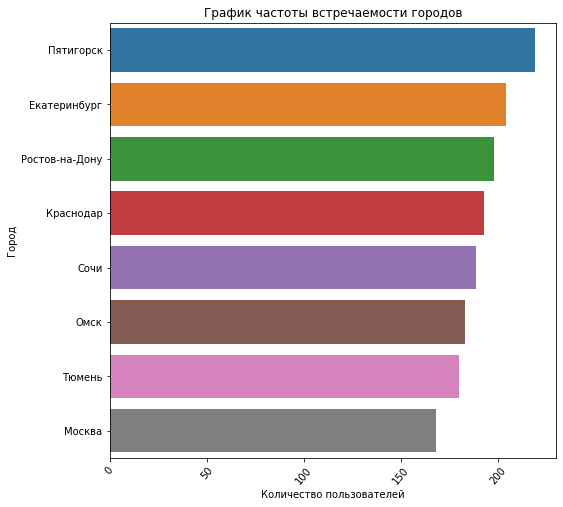

In [ ]:
plt.figure(figsize=(8, 8))
sns.barplot(x=city_counts.values, y=city_counts.index)
plt.title('График частоты встречаемости городов')
plt.xlabel('Количество пользователей')
plt.ylabel('Город')
plt.xticks(rotation=50)
plt.show()

Мы видим, что самое большое количество пользователей сервиса из **Пятигорска (219),** а самое малое - из **Москвы (168).** Но в целом, разница пользователей не слишком большая, так как между первым и последним городом - всего **около 3.3 %.**

### Соотношение пользователей с подпиской и без подписки

In [ ]:
data_users['subscription_type'].value_counts()

free     835
ultra    699
Name: subscription_type, dtype: int64

Для визуализации соотношения идеально подойдет круговая диаграмма. Построим ее, и вычислим процентное соотношение пользователей с подпиской и без.

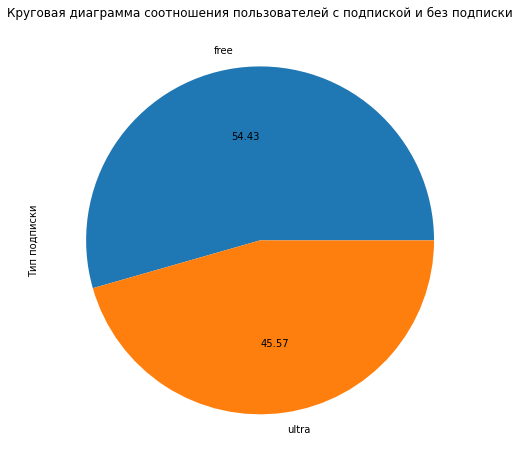

,user_id,percent_user
subscription_type,,
free,835,54.432855
ultra,699,45.567145


In [ ]:
type_users = data_users.pivot_table(index='subscription_type', values='user_id', aggfunc='count')
type_users['percent_user'] = (type_users['user_id'] / type_users['user_id'].sum()) * 100

type_users.plot(y='user_id', kind='pie', figsize=(8, 8), legend=False, autopct='%.2f')
plt.title('Круговая диаграмма соотношения пользователей с подпиской и без подписки')
plt.ylabel('Тип подписки')
plt.show()
type_users.sort_values(by='percent_user', ascending=False)

Таким образом, мы выяснили, что пользователей **без подписки (835)** на 136 человек больше, чем пользователей **с подпиской (699).** Соотношение сторон - **54.43 % на 45.57 %.**

### Возраст пользователей

In [ ]:
data_users['age'].value_counts()

25    145
24    132
26    131
23    129
27    119
22    119
28    112
21     93
20     71
30     68
29     68
31     48
19     47
18     46
32     41
33     39
17     26
34     19
16     19
35     15
15     13
14      9
13      8
36      6
12      4
38      3
37      2
39      1
43      1
Name: age, dtype: int64

In [ ]:
data_users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

Методом describe() мы узнали некоторые параметры по данным столбца с возрастом пользователей: средний возраст - около 25 лет, минимальный возраст - 12 лет, максимальный возраст - 43 года.

Для такого количества данных достаточно будет построить гистограмму, что мы и сделаем.

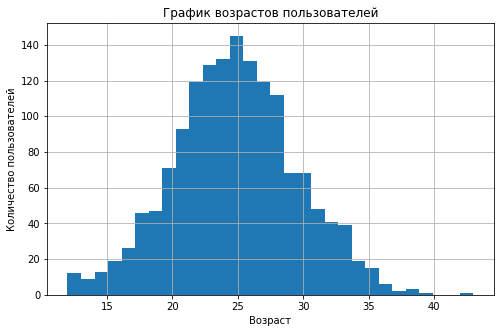

In [ ]:
data_users.plot(y='age', kind='hist', bins=30, grid=True, figsize=(8, 5), legend=False)
plt.title('График возрастов пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.show()

На гистограмме видно, что возраст пользователей распределен нормально, однако, вынужден отметить, что согласно правилам дорожного движения, арендовать самокат можно только лицам 18 лет и старше.

Больше всего сервисом пользуются пользователи **25 лет - 145 человек.** А вот пользователей **39 и 43 лет - всего по 1.**

### Расстояние, которое пользователь преодолел за одну поездку

In [ ]:
data_rides['distance'].value_counts()

741.545359     1
4158.226381    1
3672.118870    1
4533.004089    1
2437.274120    1
              ..
2949.530545    1
3289.893471    1
3047.554085    1
2931.718067    1
4031.935032    1
Name: distance, Length: 18068, dtype: int64

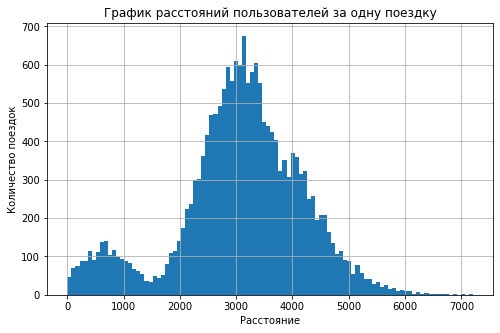

In [ ]:
data_rides.plot(y='distance', kind='hist', bins=100, grid=True, figsize=(8, 5), legend=False)
plt.title('График расстояний пользователей за одну поездку')
plt.xlabel('Расстояние')
plt.ylabel('Количество поездок')
plt.show()

In [ ]:
data_rides['distance'].min()

0.855682925681208

In [ ]:
data_rides['distance'].max()

7211.007744598519

На гистограмме виден всплеск поездок на расстояния примерно в **600-700 метров.** Возможно, это поездки от места аренды до места назначения (например, общественный транспорт, дом, работа). Затем расстояние равномерно увеличивается до пика количества значений примерно в **3100-3200 метров.** Затем, чем больше расстояние - тем меньше поездок зафиксировано. Минимальная дистанция поездки - **0.86 метра,** максимальная дистанция - **7211 метров.**

### Продолжительность поездок

In [ ]:
data_rides['duration'].value_counts()

0.500000     95
22.184080     1
25.866000     1
22.837062     1
19.173800     1
             ..
18.843765     1
17.644888     1
22.477965     1
19.745218     1
16.537044     1
Name: duration, Length: 17974, dtype: int64

По уникальным значениям мы видим, что есть значение в полминуты, которое попадается 95 раз. Скорее всего, это какая-то техническая ошибка. Зафиксируем это значение как аномалию, и отрежем его при построении гистограммы.

In [ ]:
data_rides.query('1 < duration < 3')

,user_id,distance,duration,date,month
6691,712,23.963062,2.053251,2021-11-22,11
6801,720,102.323624,2.292353,2021-09-20,9
7453,768,273.136262,2.744917,2021-02-20,2
8676,863,466.343107,2.999307,2021-04-11,4
8906,880,11.283615,2.035632,2021-03-28,3
9320,910,126.040770,2.472653,2021-02-21,2
10291,977,90.850696,2.320650,2021-08-15,8
10865,1019,216.259429,2.480577,2021-07-26,7
11336,1053,391.007269,2.902324,2021-09-10,9
12016,1103,147.453884,2.315973,2021-02-26,2


In [ ]:
data_rides['duration'].max()

40.82396261922424

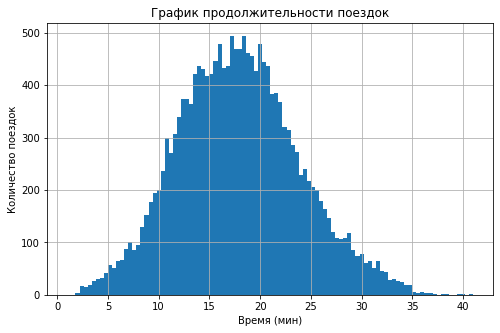

In [ ]:
data_rides.plot(y='duration', kind='hist', bins=100, grid=True, figsize=(8, 5), range=(1, 41), legend=False)
plt.title('График продолжительности поездок')
plt.xlabel('Время (мин)')
plt.ylabel('Количество поездок')
plt.show()

Гистограмма показывает, что время поездок распределено нормально. Пик количества значений приходится на отметку в **17-18 минут.** Минимальная длительность поездки, не принятая за аномалию - **около 2 минут,** максимальная - **около 41 минуты.**

Таким образом, были рассмотрены и проанализированы несколько сведений о пользователях, их поездках и подписках. Затем, построили графики для визуализации и описания каждого параметра.

## Шаг 4. Объединение данных

Для удобства дальнейшего анализа объединим 3 датафрейма (данные о пользователях, поездках, подписках) в 1 методом *merge().* После этого выведем объединенный датафрейм на экран, чтобы проверить корректность объединения.

In [ ]:
data_full = data_users.merge(data_rides, on='user_id').merge(data_subs, on='subscription_type')
data_full

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


На всякий случай, после объединения снова запустим проверку пропусков и дубликатов.

In [ ]:
print(data_full.duplicated().sum())
data_full.isna().sum()

0


user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Пропусков и дубликатов не обнаружено. Далее, из объединенного датафрейма создадим 2 новых - с данными о пользователях без подписки и с подпиской.

In [ ]:
data_users_free = data_full.query('subscription_type == "free"').reset_index(drop=True)
data_users_ultra = data_full.query('subscription_type == "ultra"').reset_index(drop=True)
data_users_free

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
1,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
2,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
3,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
4,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
11563,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
11564,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
11565,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
11566,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


In [ ]:
data_users_ultra

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
6495,699,Оксана,22,Москва,ultra,3973.046497,24.671163,2021-08-29,8,6,0,199
6496,699,Оксана,22,Москва,ultra,3288.702563,15.892886,2021-09-12,9,6,0,199
6497,699,Оксана,22,Москва,ultra,3076.159348,14.389525,2021-09-26,9,6,0,199
6498,699,Оксана,22,Москва,ultra,4707.845501,15.839579,2021-10-17,10,6,0,199


Датафреймы были созданы корректно, поэтому переходим к визуализации данных.

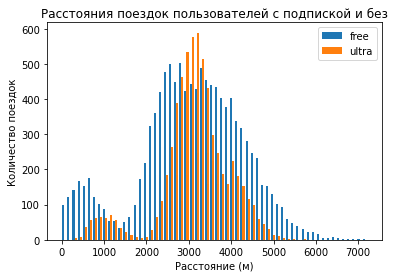

In [ ]:
plt.hist([data_users_free['distance'], data_users_ultra['distance']], bins=60, label=['free', 'ultra'])
plt.legend(loc='upper right')
plt.title('Расстояния поездок пользователей с подпиской и без')
plt.xlabel('Расстояние (м)')
plt.ylabel('Количество поездок')
plt.show()

На графике видно, что у пользователей с подпиской минимальное расстояние больше, чем у пользователей без подписки. Как и максимальное количество поездок пользователей на пике значений: у пользователей с подпиской - **около 580 поездок** на отметках в **3100-3200 метров,** у пользователей без подписки - **около 500 поездок** на отметках в **2500 и 2700 метров.** Однако, пользователи без подписки совершают более дальние поездки: максимальное расстояние - примерно **7200 метров** у пользователей без подписки против примерно **5800 метров** у пользователей с подпиской.

Теперь сравним время поездок. Как и в прошлый раз, аномальные значения из графика исключим.

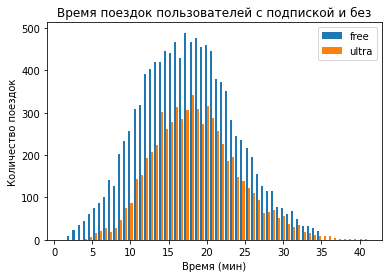

In [ ]:
plt.hist([data_users_free['duration'], data_users_ultra['duration']], bins=60, label=['free', 'ultra'], range=(1, 41))
plt.legend(loc='upper right')
plt.title('Время поездок пользователей с подпиской и без')
plt.xlabel('Время (мин)')
plt.ylabel('Количество поездок')
plt.show()

Как и на прошлом графике, минимальное значение отличается - у пользователей с подпиской оно больше. Однако, максимальное количество поездок пользователей на пике значений сильно отличается в пользу пользователей без подписки - **около 480 поездок** на отметке в **17 минут** против **около 330 поездок** на отметке в **18 минут.** А максимальное время поездки в этот раз больше у пользователей с подпиской **(около 41 минуты),** чем у пользователей без подписки **(около 35 минут).**

Данные проанализированы, переходим к следующему шагу.

## Шаг 5. Подсчёт выручки

Для подсчета выручки создадим агрегированный датафрейм из объединенного датафрейма в пункте 4.1. В первую очередь, округлим значения времени поездок до следующего целого числа. Для этого нам понадобится метод *ceil()* из библиотеки *numpy.*

In [ ]:
data_full['duration'] = np.ceil(data_full['duration'])
data_full

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,26.0,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,16.0,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,7.0,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,19.0,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,27.0,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,20.0,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,22.0,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,19.0,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,17.0,2021-11-27,11,8,50,0


Теперь объединим количество, длительность и время поездок для каждого пользователя в каждом месяце.

In [ ]:
data_revenue = (data_full.groupby(['user_id', 'month', 'subscription_type'])
    .agg({'month': ['count'], 'distance': ['sum'], 'duration': ['sum']}).reset_index())
data_revenue.columns = ['user_id', 'month', 'subscription_type', 'count_in_month', 'sum_distance', 'sum_duration']
data_revenue

,user_id,month,subscription_type,count_in_month,sum_distance,sum_duration
0,1,1,ultra,2,7027.511294,42.0
1,1,4,ultra,1,754.159807,7.0
2,1,8,ultra,2,6723.470560,46.0
3,1,10,ultra,2,5809.911100,32.0
4,1,11,ultra,3,7003.499363,56.0
...,...,...,...,...,...,...
11326,1534,6,free,2,3409.468534,26.0
11327,1534,8,free,2,7622.453034,48.0
11328,1534,9,free,1,4928.173852,23.0
11329,1534,11,free,4,13350.015305,78.0


И наконец, для удобства подсчета помесячной выручки, добавим в агрегированный датафрейм данные о подписках.

In [ ]:
data_revenue = data_revenue.merge(data_subs, on='subscription_type')
data_revenue

,user_id,month,subscription_type,count_in_month,sum_distance,sum_duration,minute_price,start_ride_price,subscription_fee
0,1,1,ultra,2,7027.511294,42.0,6,0,199
1,1,4,ultra,1,754.159807,7.0,6,0,199
2,1,8,ultra,2,6723.470560,46.0,6,0,199
3,1,10,ultra,2,5809.911100,32.0,6,0,199
4,1,11,ultra,3,7003.499363,56.0,6,0,199
...,...,...,...,...,...,...,...,...,...
11326,1534,6,free,2,3409.468534,26.0,8,50,0
11327,1534,8,free,2,7622.453034,48.0,8,50,0
11328,1534,9,free,1,4928.173852,23.0,8,50,0
11329,1534,11,free,4,13350.015305,78.0,8,50,0


Теперь перейдем к расчету выручки - воспользуемся формулой: стоимость старта поездки × количество поездок + стоимость одной минуты поездки × общая продолжительность всех поездок в минутах + стоимость подписки. Создадим новый столбец, где будет отражен результат для каждого месяца. Выведем итоговый датафрейм на экран и визуализируем полученные данные.

In [ ]:
data_revenue['revenue_in_month'] = data_revenue['start_ride_price'] * data_revenue['count_in_month'] \
    + data_revenue['minute_price'] * data_revenue['sum_duration'] + data_revenue['subscription_fee']
data_revenue

,user_id,month,subscription_type,count_in_month,sum_distance,sum_duration,minute_price,start_ride_price,subscription_fee,revenue_in_month
0,1,1,ultra,2,7027.511294,42.0,6,0,199,451.0
1,1,4,ultra,1,754.159807,7.0,6,0,199,241.0
2,1,8,ultra,2,6723.470560,46.0,6,0,199,475.0
3,1,10,ultra,2,5809.911100,32.0,6,0,199,391.0
4,1,11,ultra,3,7003.499363,56.0,6,0,199,535.0
...,...,...,...,...,...,...,...,...,...,...
11326,1534,6,free,2,3409.468534,26.0,8,50,0,308.0
11327,1534,8,free,2,7622.453034,48.0,8,50,0,484.0
11328,1534,9,free,1,4928.173852,23.0,8,50,0,234.0
11329,1534,11,free,4,13350.015305,78.0,8,50,0,824.0


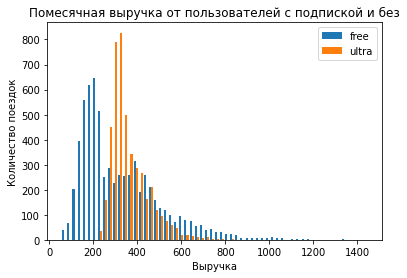

In [ ]:
data_revenue_free = data_revenue.query('subscription_type == "free"')
data_revenue_ultra = data_revenue.query('subscription_type == "ultra"')

plt.hist([data_revenue_free['revenue_in_month'], data_revenue_ultra['revenue_in_month']], bins=60, label=['free', 'ultra'])
plt.legend(loc='upper right')
plt.title('Помесячная выручка от пользователей с подпиской и без')
plt.xlabel('Выручка')
plt.ylabel('Количество поездок')
plt.show()

Мы посчитали и визуализировали помесячную выручку каждого пользователя, и можем переходить к проверке гипотез.

## Шаг 6. Проверка гипотез

Перед тем, как сервис внедрит акции для новых подписчиков с целью их увеличения, проверим несколько гипотез. Первая - пользователи с подпиской тратят больше времени на поездки, и являются более «выгодными» для компании. Для проверки гипотезы воспользуемся двухвыборочным тестом для независимых выборок с альтернативной односторонней гипотезой.

Нулевая гипотеза - пользователи с подпиской и без тратят одинаковое количество времени на поездки.
Альтернативная гипотеза - пользователи с подпиской тратят больше времени на поездки, чем пользователи без подписки.

In [ ]:
print('Среднее первой выборки:', np.mean(data_users_free['duration']))
print('Среднее второй выборки:', np.mean(data_users_ultra['duration']))

alpha = .05

results = st.ttest_ind(data_users_free['duration'], data_users_ultra['duration'], alternative='less')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Среднее первой выборки: 17.39090929866399
Среднее второй выборки: 18.54198516280583
p-значение: 1.2804098316645618e-34
Отвергаем нулевую гипотезу


Получается, что скорее всего продакт-менеджеры правы, и пользователи с подпиской тратят больше времени на поездки (18.5 минут), чем пользователи без подписки (17.4 минуты). Однако, эта разница не слишком весомая, чтобы утверждать о том, что больше подписчиков принесут больше выгоды для компании, так как стоимость поездки за минуту больше у пользователей без подписки. Но мы можем точно утверждать, что среднее время поездок пользователей с подпиской и без не равны, так как нулевая гипотеза будет отвергнута при уровне 5 % и даже 1 % статистической значимости.

Рассмотрим следующую гипотезу - пользователи с подпиской в среднем проезжают не более 3130 метров (оптимальное расстояние с точки зрения износа самоката по мнению продакт-менеджеров). Для проверки снова подойдет односторонняя гипотеза, а тест в этот раз будет одновыборочным.

Нулевая гипотеза - пользователи с подпиской в среднем проезжают 3130 метров за одну поездку.
Альтернативная гипотеза - пользователи с подпиской в среднем проезжают больше 3130 метров за одну поездку.

In [ ]:
print('Среднее выборки:', np.mean(data_users_ultra['distance']))

value = 3130

alpha = .05

results = st.ttest_1samp(data_users_ultra['distance'], value, alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Среднее выборки: 3115.4453880370247
p-значение: 0.9195368847849785
Не получилось отвергнуть нулевую гипотезу


Скорее всего, в этот раз продакт-менеджеры полностью правы, так как пользователи с подпиской в среднем за одну поездку проезжают около 3115 метров, а это значение не больше 3130 метров. Значит, это расстояние можно считать оптимальным с точки зрения износа самоката. Нулевую гипотезу отвергнуть не получилось, а p-значение очень высокое - 92 %.

Теперь проверим последнюю гипотезу - помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Здесь нам снова понадобится двухвыборочный тест для независимых выборок с альтернативной односторонней гипотезой.

Нулевая гипотеза - помесячная выручка от пользователей с подпиской и без по месяцам равна.
Альтернативная гипотеза - помесячная выручка от пользователей с подпиской по месяцам выше, чем от пользователей без подписки.

In [ ]:
print('Среднее первой выборки:', np.mean(data_revenue_free['revenue_in_month']))
print('Среднее второй выборки:', np.mean(data_revenue_ultra['revenue_in_month']))

alpha = .05

results = st.ttest_ind(data_revenue_free['revenue_in_month'], data_revenue_ultra['revenue_in_month'], alternative='less')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Среднее первой выборки: 328.6413651073845
Среднее второй выборки: 362.7921906022502
p-значение: 1.8850394384715216e-31
Отвергаем нулевую гипотезу


И в этот раз продакт-менеджеры скорее всего правы, и пользователи с подпиской приносят для компании больше помесячной выручки, чем пользователи без подписки.

И напоследок, представим следующую ситуацию и ответим на вопрос: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест нам понадобился бы для проверки этой гипотезы?

Для расчета такой гипотезы нам подошел бы двухвыборочный тест для зависимых (парных) выборок с альтернативной односторонней гипотезой. Для расчета в *Python* используется метод *st.ttest_rel()* из библиотеки *scipy.stats.*

## Общий вывод

Мы провели исследование популярного сервиса аренды самокатов GoFast, и выяснили некоторые параметры о пользователях сервиса, их поездках и подписках. Среди ключевых можно отметить следующее:

- пользователей сервиса больше всего в **Пятигорске (219),** меньше всего - в **Москве (168).**
- пользователей **без подписки (835)** больше, чем пользователей **с подпиской (699).**
- больше всего сервисом пользуются пользователи **25 лет - 145 человек.**
- среднее расстояние поездок - **3100-3200 метров,** максимальное расстояние - **около 7200 метров.**
- среднее время поездок - **17-18 минут,** максимальное время - **около 41 минуты.**

Также, были проверены некоторые гипотезы, выдвинутые продакт-менеджерами компании. Благодаря проверке были получены следующие данные:

- среднее время поездок пользователей с подпиской скорее всего больше **(18.5),** чем у пользователей без подписки **(17.4).** Однако, нельзя точно утверждать, что пользователи с подпиской более выгодны только на основании времени, так как стоимость одной минуты поездки больше у пользователей без подписки.
- среднее расстояние поездок пользователей скорее всего **не превышает 3130 метров,** и можно утверждать, что это расстояние является оптимальным с точки зрения износа самоката.
- помесячная выручка от пользователей с подпиской скорее всего выше **(362.8),** чем от пользователей без подписки **(328.6).**

Таким образом, есть основания утверждать, что введение акций для привлечения новых подписчиков имеет смысл, так как они проводят больше времени в поездках и приносят больше выручки. Однако, можно порекомендовать увеличить выборку пользователей для более объективного исследования. Возможно тогда можно будет уверенно утверждать, что время поездок пользователей с подпиской существенно больше.